In [22]:
import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import sklearn
import statistics
import seaborn as sns

In [5]:
year = 2023
race = "R"
sessions = [None for i in range(11)]

for i in range(11):
    session = fastf1.get_session(year, i+1, race)
    session.load()
    sessions[i] = session

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for drive

**try it for each GP first**<br>pick up RPM, Speed, Throttle as attributes

In [43]:
sessions[0].laps.pick_driver("VER").columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [7]:
sessions[0].laps.Driver.unique()

array(['VER', 'GAS', 'PER', 'ALO', 'LEC', 'STR', 'SAR', 'MAG', 'DEV',
       'TSU', 'ALB', 'ZHO', 'HUL', 'OCO', 'NOR', 'HAM', 'SAI', 'RUS',
       'BOT', 'PIA'], dtype=object)

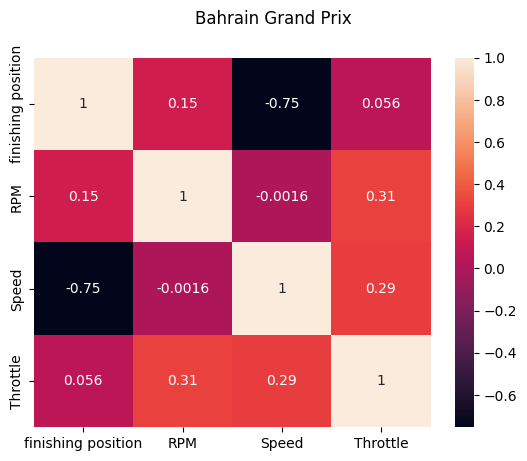

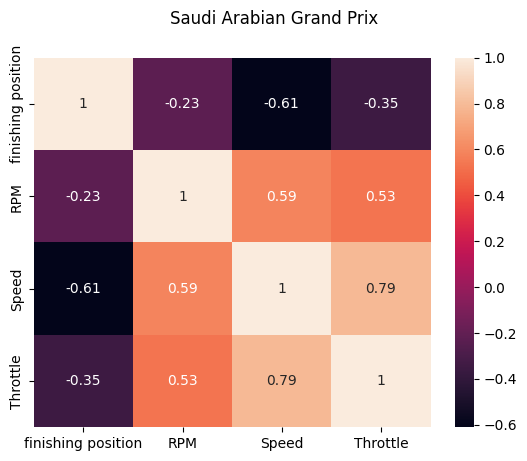

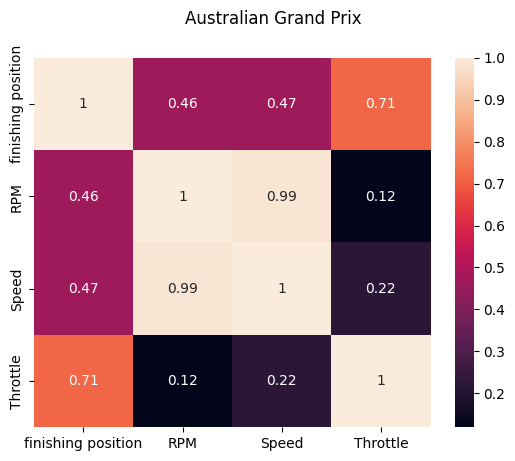

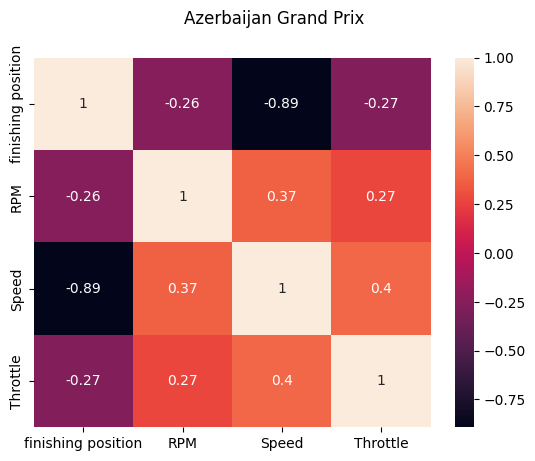

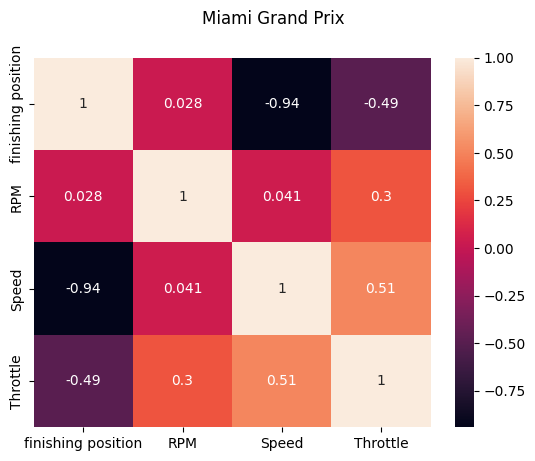

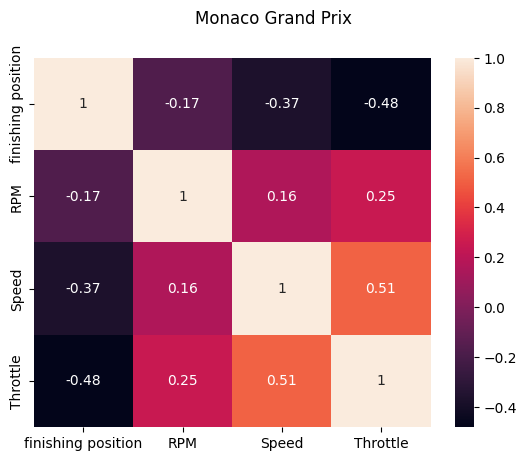

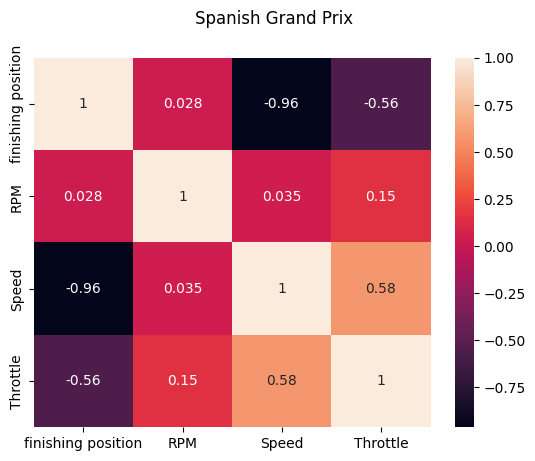

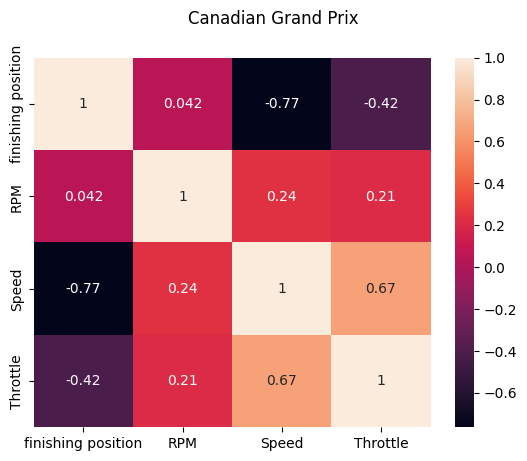

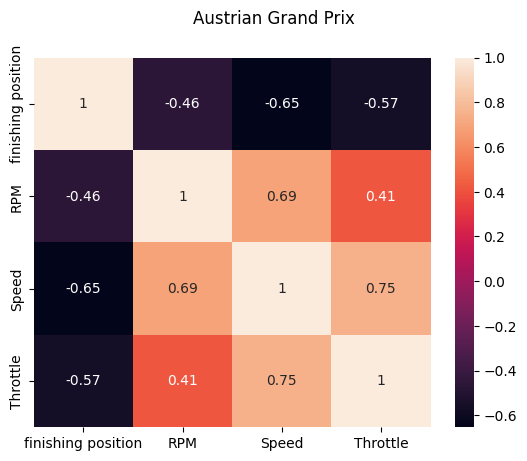

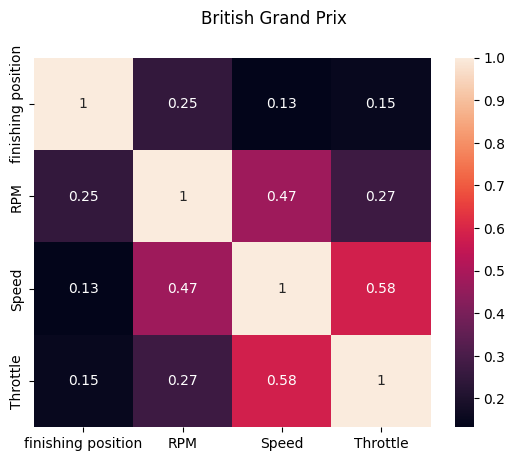

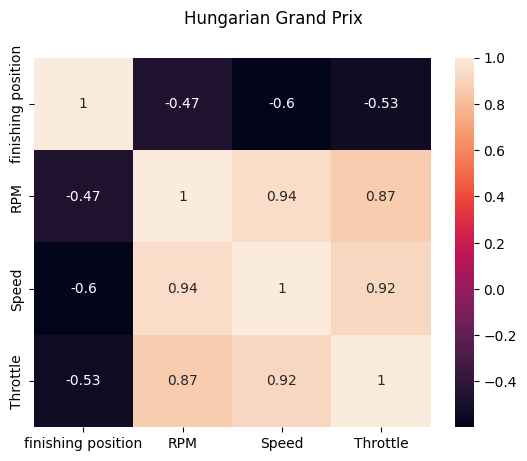

In [45]:
for session in sessions:
    position_list = [None for i in range(len(session.laps.Driver.unique()))]
    for i in range(len(session.laps.Driver.unique())):        
        position_list[i] = session.laps.pick_driver(session.laps.Driver.unique()[i]).iloc[-1].Position

    position_list = [21.0 if np.isnan(x) else x for x in position_list]

    RPM_list = [None for i in range(len(session.laps.Driver.unique()))]
    for i in range(len(session.laps.Driver.unique())):
        RPM_list[i] = session.laps.pick_driver(session.laps.Driver.unique()[i]).telemetry.RPM.mean()

    Speed_list = [None for i in range(len(session.laps.Driver.unique()))]
    for i in range(len(session.laps.Driver.unique())):
        Speed_list[i] = session.laps.pick_driver(session.laps.Driver.unique()[i]).telemetry.Speed.mean()

    Throttle_list = [None for i in range(len(session.laps.Driver.unique()))]
    for i in range(len(session.laps.Driver.unique())):
        Throttle_list[i] = session.laps.pick_driver(session.laps.Driver.unique()[i]).telemetry.Throttle.mean()

    df = {"finishing position": position_list, "RPM": RPM_list, "Speed": Speed_list, "Throttle":Throttle_list}
    df = pd.DataFrame(df)

    # Create the correlation matrix
    corr_matrix = df.corr()

    # Create a heatmap from the correlation matrix
    sns.heatmap(corr_matrix, annot=True)

    plt.suptitle(f"{session.event.EventName}")
    plt.show()

some grand prix showed a significant correlation among the finishing position and the means of RPM, Speed, and Throttle. However, the finishing position looks it is not necessarily correlated to these parameters. We will look at the positions gained throughout each race and check the correlation next.
Alternatively, this might suggest depending on the circuit layout, how these parameters are related to the finishing position should be changed. Therefore, we'll divide the data into minisectors and see the correlation among these parameters and the finishing position and the positions gained.

In [59]:
drivers = sessions[0].laps.Driver.unique()

In [63]:
drivers

array(['VER', 'GAS', 'PER', 'ALO', 'LEC', 'STR', 'SAR', 'MAG', 'DEV',
       'TSU', 'ALB', 'ZHO', 'HUL', 'OCO', 'NOR', 'HAM', 'SAI', 'RUS',
       'BOT', 'PIA'], dtype=object)

In [65]:
for driver in drivers:
    a = sessions[2].results.loc[sessions[0].results["Abbreviation"] == driver]
    b = a["GridPosition"]
    print(b)

1    1.0
Name: GridPosition, dtype: float64
10    9.0
Name: GridPosition, dtype: float64
11    0.0
Name: GridPosition, dtype: float64
14    4.0
Name: GridPosition, dtype: float64
16    7.0
Name: GridPosition, dtype: float64
18    6.0
Name: GridPosition, dtype: float64
2    18.0
Name: GridPosition, dtype: float64
20    14.0
Name: GridPosition, dtype: float64
21    15.0
Name: GridPosition, dtype: float64
22    12.0
Name: GridPosition, dtype: float64
23    8.0
Name: GridPosition, dtype: float64
24    17.0
Name: GridPosition, dtype: float64
27    10.0
Name: GridPosition, dtype: float64
31    11.0
Name: GridPosition, dtype: float64
4    13.0
Name: GridPosition, dtype: float64
44    3.0
Name: GridPosition, dtype: float64
55    5.0
Name: GridPosition, dtype: float64
63    2.0
Name: GridPosition, dtype: float64
77    0.0
Name: GridPosition, dtype: float64
81    16.0
Name: GridPosition, dtype: float64


In [72]:
for session in sessions:
    position_list = [None for i in range(len(session.laps.Driver.unique()))]
    for i in range(len(session.laps.Driver.unique())):        
        position_list[i] = session.laps.pick_driver(session.laps.Driver.unique()[i]).iloc[-1].Position

    position_list = [21.0 if np.isnan(x) else x for x in position_list]
    
    drivers = session.laps.Driver.unique()
    grid_position_list = [None for i in range(len(session.laps.Driver.unique()))]
    for i in range(len(session.laps.Driver.unique())):
        grid_position_list[i] = session.results.loc[session.results["Abbreviation"] == drivers[i]]["GridPosition"]
    print(grid_position_list, "\n")

    grid_position_list = [float(20.0) if x == 0.0 else x for x in grid_position_list]

    RPM_list = [None for i in range(len(session.laps.Driver.unique()))]
    for i in range(len(session.laps.Driver.unique())):
        RPM_list[i] = session.laps.pick_driver(session.laps.Driver.unique()[i]).telemetry.RPM.mean()

    Speed_list = [None for i in range(len(session.laps.Driver.unique()))]
    for i in range(len(session.laps.Driver.unique())):
        Speed_list[i] = session.laps.pick_driver(session.laps.Driver.unique()[i]).telemetry.Speed.mean()

    Throttle_list = [None for i in range(len(session.laps.Driver.unique()))]
    for i in range(len(session.laps.Driver.unique())):
        Throttle_list[i] = session.laps.pick_driver(session.laps.Driver.unique()[i]).telemetry.Throttle.mean()

    df = {"finishing position": position_list, "RPM": RPM_list, "Speed": Speed_list, "Throttle":Throttle_list}
    df = pd.DataFrame(df)

    """# Create the correlation matrix
    corr_matrix = df.corr()

    # Create a heatmap from the correlation matrix
    sns.heatmap(corr_matrix, annot=True)

    plt.suptitle(f"{session.event.EventName}")
    plt.show()"""

[1    1.0
Name: GridPosition, dtype: float64, 10    20.0
Name: GridPosition, dtype: float64, 11    2.0
Name: GridPosition, dtype: float64, 14    5.0
Name: GridPosition, dtype: float64, 16    3.0
Name: GridPosition, dtype: float64, 18    8.0
Name: GridPosition, dtype: float64, 2    16.0
Name: GridPosition, dtype: float64, 20    17.0
Name: GridPosition, dtype: float64, 21    19.0
Name: GridPosition, dtype: float64, 22    14.0
Name: GridPosition, dtype: float64, 23    15.0
Name: GridPosition, dtype: float64, 24    13.0
Name: GridPosition, dtype: float64, 27    10.0
Name: GridPosition, dtype: float64, 31    9.0
Name: GridPosition, dtype: float64, 4    11.0
Name: GridPosition, dtype: float64, 44    7.0
Name: GridPosition, dtype: float64, 55    4.0
Name: GridPosition, dtype: float64, 63    6.0
Name: GridPosition, dtype: float64, 77    12.0
Name: GridPosition, dtype: float64, 81    18.0
Name: GridPosition, dtype: float64] 



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().